Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Md. Sakib Bin Alam"
ID = "st122574"

---

# Lab 10: Unsupervised Learning with $k$-means and PCA

In this lab, we begin our survey of common unsupervised learning methods such as k-means and PCA.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise

Write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    there's a naive implementation of the algorithm in this notebook below. You can use it or make your own implementation.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> function from sklearn for create dataset. Or you can make them yourself. :)
</details>

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.5, random_state=0)

In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[ 0.51985897  4.86229547]
 [ 1.69246883  0.20598168]
 [ 1.35678894  4.36462484]
 [-1.5698694   3.01502873]
 [-1.63667453  2.37586395]]
y=
 [0 1 0 2 2]
0 2
3


AssertionError: group type is incorrect

### Exercise 1.2 (5 points)

Plot the data. Separate the data by color.

In [4]:
#np.unique(y)

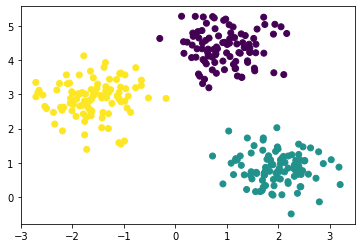

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:, 1], c=y)

# YOUR CODE HERE
#raise NotImplementedError()

**Expect result**:

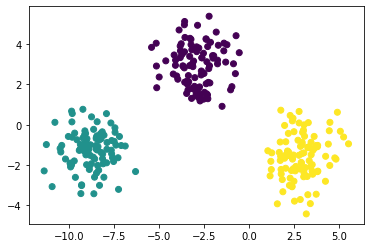

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

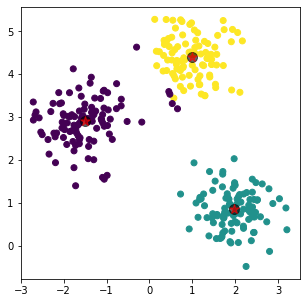

In [6]:
import numpy as np
from IPython.display import clear_output
import time
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances
import random

# 1. initialize 3 random centers
#error = 9999999999.0

ix = random.sample(range(0, X.shape[0]),3)
centers = X[ix]
means =  np.zeros((centers.shape)) 

while True:
    # 2. find the nearest centers for each of the points
        #return the index of centers having smallest
        #distance with X
    labels = pairwise_distances_argmin(X, centers)
    
    # 3. plot the graph. Do not forget to use clear_output
    
    # 4. find the mean of each centers
    for i in range(centers.shape[0]):
        means[i] = np.mean(X[np.where(labels == i)],axis = 0)
    
    # I will assign this mean to update center value in the 'if' block
    
    plt.figure(figsize=(5, 5))
    #plt.title(f"Iteration: {iter_}")
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], s=100,marker = 'o', c="black", alpha=0.6)
    plt.scatter(means[:, 0], means[:, 1], s=100,marker = '*', c="red", alpha=0.6)
    plt.show()
    
    # 5. calculate sum square error to check error. If the error is less than 1e-6, you can stop the loop.
    error = 0.0 
    for i in range(centers.shape[0]):
        error += ((means[i,:] - centers[i,:])**2).sum()
    
    if error < 1e-6:
        break
    else:
        centers = means
    
    time.sleep(1)
    clear_output()

# YOUR CODE HERE
#raise NotImplementedError()

In [7]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[-1.50136785  2.90597464]
 [ 1.96887266  0.84517309]
 [ 0.99099458  4.39814729]]
success!


**Expect result**:

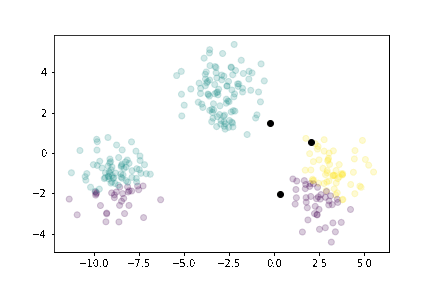

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [9]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [10]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

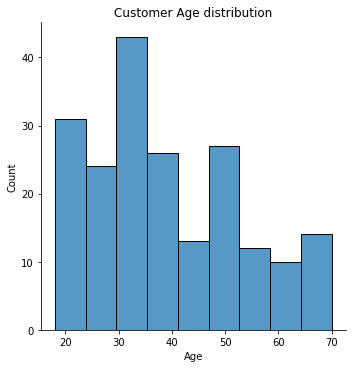

In [11]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

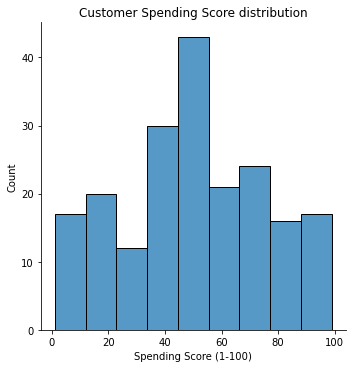

In [12]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

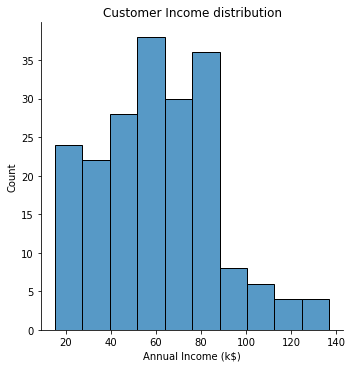

In [13]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

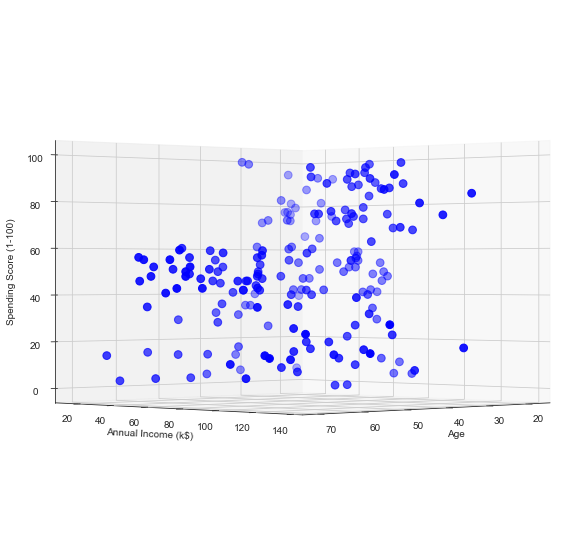

In [14]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [15]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

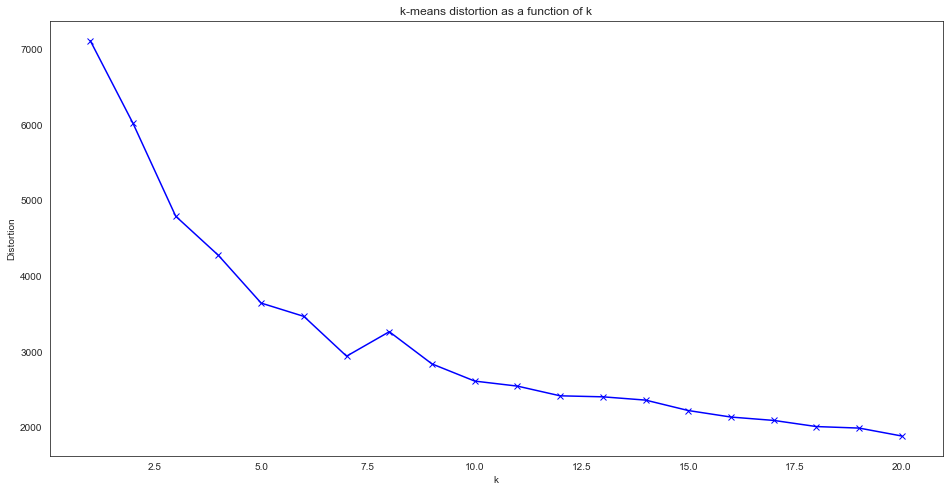

In [16]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

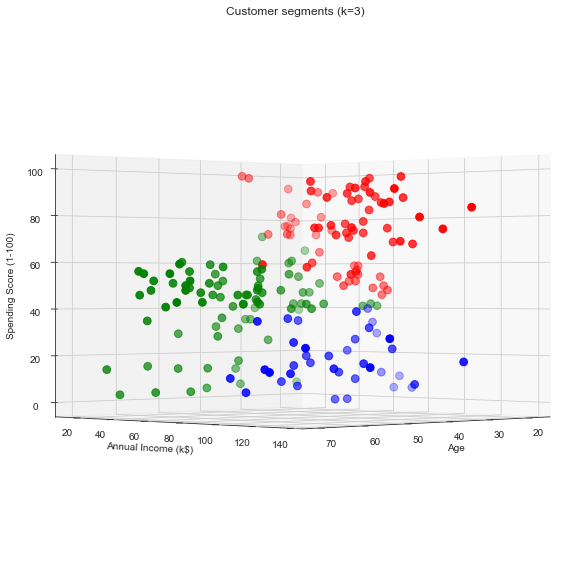

In [17]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

1. Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.
2. Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [18]:
# YOUR CODE HERE
#raise NotImplementedError()
df[df.label == 0].mean()

Age                       40.394737
Annual Income (k$)        87.000000
Spending Score (1-100)    18.631579
label                      0.000000
dtype: float64

The cluster represents young age with low income and medium spending score

In [19]:
df[df.label == 1].mean()

Age                       28.779221
Annual Income (k$)        64.844156
Spending Score (1-100)    75.038961
label                      1.000000
dtype: float64

The cluster represents mid age with high income and high spending score

In [20]:
df[df.label == 2].mean()

Age                       47.282353
Annual Income (k$)        44.858824
Spending Score (1-100)    41.811765
label                      2.000000
dtype: float64

The cluster represents middle age people with mid range income and low spending score

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

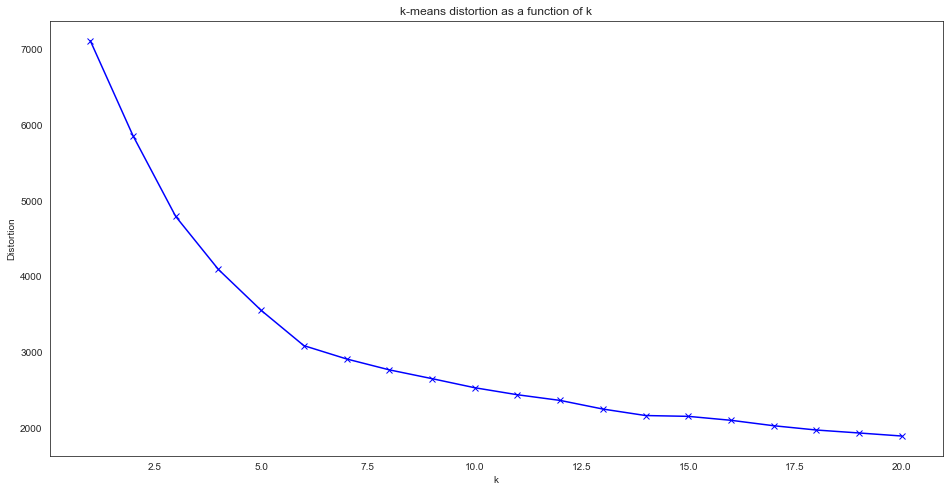

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
# YOUR CODE HERE
iters = 10 #try 20 different initialisations

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(iters):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

With 10 iterations the curve is more smoother now. It seems to elbow at k = 6

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [22]:
!pip install kmeans-pytorch
!pip install tqdm

In [23]:
import torch
from kmeans_pytorch import kmeans

In [24]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 9it [00:00, 85.32it/s, center_shift=0.000000, iteration=9, tol=0.000100] 


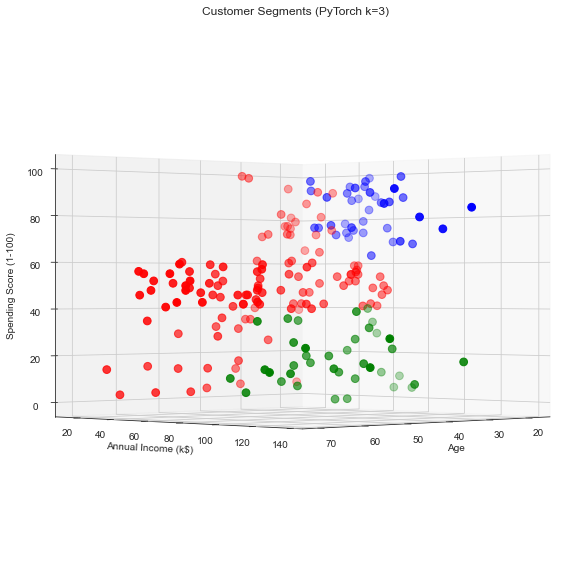

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

Dataset: https://www.kaggle.com/code/gabrielbchacon/clustering-the-countries-by-k-means/data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Load Data

In [27]:
df = pd.read_csv("country.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Dataset head (first five rows):



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Preparation

In [28]:
df.drop(['country'], axis=1, inplace=True)
df[:5]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
# Drop missing values
df = df.dropna()
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

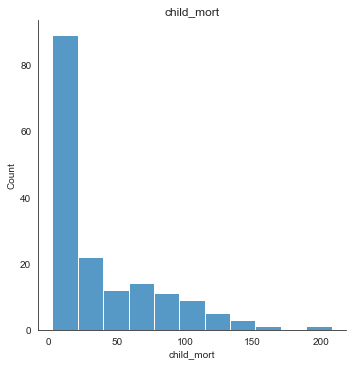

In [32]:
sns.displot(df.child_mort)
_ = plt.title('child_mort')

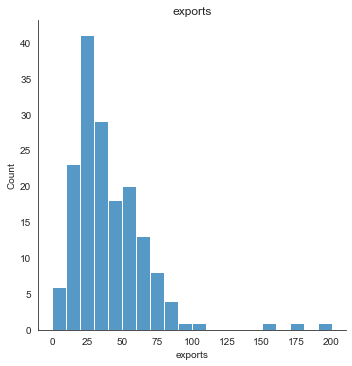

In [34]:
sns.displot(df.exports)
_ = plt.title('exports')

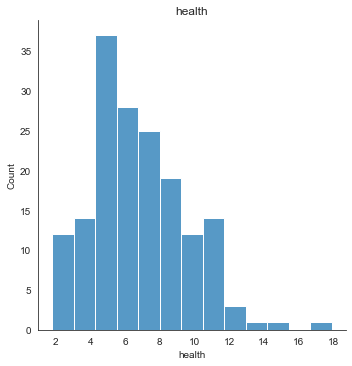

In [35]:
sns.displot(df.health)
_ = plt.title('health')

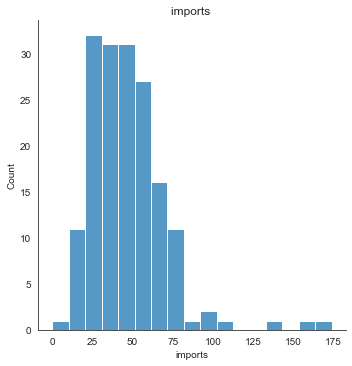

In [36]:
sns.displot(df.imports )
_ = plt.title('imports ')

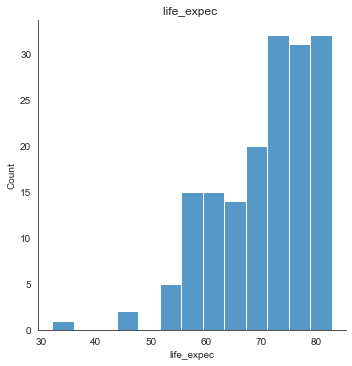

In [37]:
sns.displot(df.life_expec )
_ = plt.title('life_expec ')

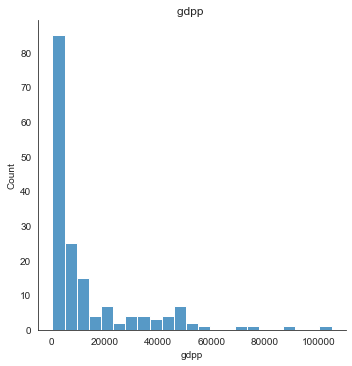

In [38]:
sns.displot(df.gdpp )
_ = plt.title('gdpp ')

## k-means

In [30]:
def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

## Find suitable k

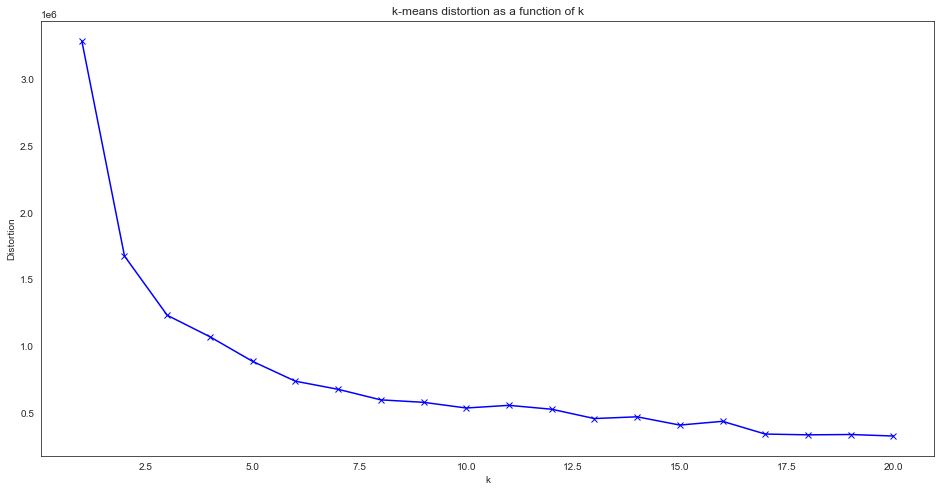

In [31]:
iters = 10 #try 10 different initialisations

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(iters):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

There's a good elbow at around 3. Therefore the suitable k is assumed 3

In [32]:
#chosen k = 3
k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c
df['label'].unique()

array([0., 2., 1.])

Text(0, 0.5, 'child mortality')

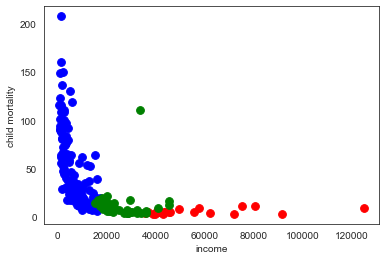

In [33]:
plt.scatter(df['income'][df.label == 0], df["child_mort"][df.label == 0], c='blue', s=60)
plt.scatter(df['income'][df.label == 1], df["child_mort"][df.label == 1], c='red', s=60)
plt.scatter(df['income'][df.label == 2], df["child_mort"][df.label == 2], c='green', s=60)
plt.xlabel('income')
plt.ylabel('child mortality')

In [34]:
df[df.label == 0].mean()

child_mort      53.744037
exports         33.251367
health           6.314771
imports         45.476751
income        6485.899083
inflation        9.152055
life_expec      66.632110
total_fer        3.502110
gdpp          3074.990826
label            0.000000
dtype: float64

Cluster 0 represents countries with high child mortality rate. The average income of the country is low and life expectation is medium.

In [36]:
df[df.label == 1].mean()

child_mort        5.077273
exports          63.168182
health            8.942727
imports          51.259091
income        54800.000000
inflation         3.308727
life_expec       80.427273
total_fer         1.800000
gdpp          52554.545455
label             1.000000
dtype: float64

Cluster 1 represents countries with low child mortality rate. The average income of the country is high and life expectation is also high.

In [37]:
df[df.label == 2].mean()

child_mort       11.702778
exports          51.419444
health            7.032500
imports          48.500000
income        26405.555556
inflation         6.366667
life_expec       76.402778
total_fer         1.971667
gdpp          18712.222222
label             2.000000
dtype: float64

Cluster 2 represents countries with high medium mortality rate. The average income of the country is medium and life expectation is also medium.

## Pytorch

In [38]:
import torch
from kmeans_pytorch import kmeans

x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c
print(df['label'].unique())

running k-means on cpu..


[running kmeans]: 14it [00:00, 666.65it/s, center_shift=0.000000, iteration=14, tol=0.000100]      

[2 0 1]


Text(0, 0.5, 'child mortality')

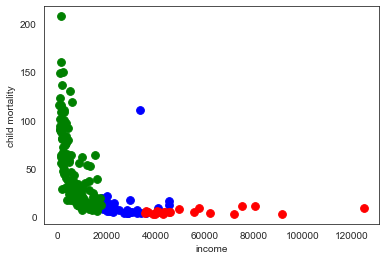

In [39]:
plt.scatter(df['income'][df.label == 0], df["child_mort"][df.label == 0], c='blue', s=60)
plt.scatter(df['income'][df.label == 1], df["child_mort"][df.label == 1], c='red', s=60)
plt.scatter(df['income'][df.label == 2], df["child_mort"][df.label == 2], c='green', s=60)
plt.xlabel('income')
plt.ylabel('child mortality')

### Report <br>
In the In-lab and take home I performed k-means algorithm in two dataset. In in the take homw after data preparation part I have implemented k-means. To select the suitable k I performed elbow method and found the k=3 would be suitable. Then the 3 clusters gave the following results. <br>

Cluster 0 represents countries with high child mortality rate. The average income of the country is low and life expectation is medium. <br>

Cluster 1 represents countries with low child mortality rate. The average income of the country is high and life expectation is also high. <br>

Cluster 2 represents countries with high medium mortality rate. The average income of the country is medium and life expectation is also medium.

## Principle Component Analysis (PCA)

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).

## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Load movie names and movie ratings

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
movies[:5]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings[:5]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


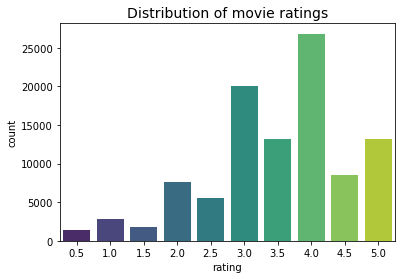

In [6]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [7]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)
df1[:5]

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [8]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [9]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [10]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ...  5.05400143e-10+0.00000000e+00j
  -8.56595933e-10-2.73135228e-10j -8.56595933e-10+2.73135228e-10j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ... -1.34421875e-11+0.00000000e+00j
   4.06360292e-11+1.36123237e-11j  4.06360292e-11-1.36123237e-11j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ... -1.25684120e-11+0.00000000e+00j
   2.38196330e-11+7.14156730e-12j  2.38196330e-11-7.14156730e-12j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ... -1.82458833e-09+0.00000000e+00j
   4.43804424e-09+1.40833402e-09j  4.43804424e-09-1.40833402e-09j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  2.07113188e-11+0.00000000e+00j
  -4.29918117e-09-1.52327248e-09j

**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [11]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.2206886294059
438.9889489555744
379.04045272530294
324.316245865245
259.1091962886288
251.67075199496293
226.08065316490536
206.77043202389692
186.08012008011897
180.35681567362886
150.57689826878513
140.533510425566
135.004255437757
116.75931121355595
111.22844429826357
105.9858855640002
101.5206110886344
92.38143975955742
87.20146448316879
83.9470452582847
76.51329078142064
73.12943769509788
71.33450019035182
68.6691687507292
68.11563805135069
66.09778445224133
64.7977288651972
64.76738664207971
60.57541016802235
60.09570157695349
58.44406220313035
57.14388076236277
55.70369700851548
55.15327698764717
54.42361668166461
53.62311697140706
49.75425330272129
49.22568958301028
47.79220889336277
46.74358114245131
46.445279880805266
45.3395513474695
45.09994762096554
44.619865966440834
44.256502467638086
43.961387761591446
42.67209649629781
41.738887045201956
41.05033324888544
41.226910399687235
40.0211441041269
39.19814382275306
37.927

### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [12]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

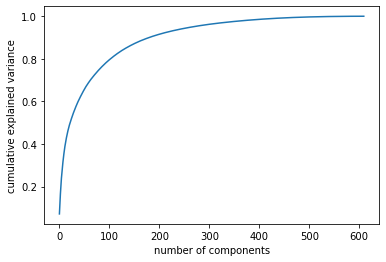

In [13]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Take Home Exercise

Use [Siricon wafer thickness](https://openmv.net/info/silicon-wafer-thickness) dataset which contains data
- $N=184$
- $k=9$

1. Build a PCA model on all the data.
2. Plot the scores for the first two components. What do you notice? Investigate the outliers, and the raw data for each of these unusual observations. What do you conclude about those observations?

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [15]:
data = pd.read_csv('silicon-wafer.csv')
data[:10]

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259


## Standadardization

In [17]:
X_std = StandardScaler().fit_transform(data)
X_std[:5]

array([[-0.10326457, -0.13563885, -0.70366191, -0.2986884 ,  0.09696784,
        -0.41417049, -1.16628455, -0.16314832, -0.41944359],
       [-0.2047981 , -0.28081557, -0.29030696, -0.18390986, -0.22309385,
        -0.21755537, -0.28198236, -0.25885393, -0.07319101],
       [ 0.49759143,  0.53628526,  0.72654619,  0.60603656,  0.39261806,
         0.04749486,  0.33519959,  0.04495575,  0.06751234],
       [ 0.72986678,  0.68017723,  0.36830524,  0.07265394,  0.57299181,
         0.32123525, -0.220996  , -0.62720926,  0.44557611],
       [ 0.35433178,  0.45020703,  0.6796993 ,  0.49260836,  0.27056063,
         0.00838909,  0.30226695, -0.00957419,  0.15682837]])

## Compute the covariance matrix

In [18]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[1.00546448 0.98980538 0.97997602 0.97807363 0.9617337  0.85291894
  0.89103314 0.86019818 0.92713364]
 [0.98980538 1.00546448 0.96150716 0.97210764 0.94937944 0.87514197
  0.88108862 0.86983065 0.92269981]
 [0.97997602 0.96150716 1.00546448 0.9630117  0.95380349 0.82458104
  0.90500498 0.85394521 0.92042348]
 [0.97807363 0.97210764 0.9630117  1.00546448 0.93355597 0.85024231
  0.87547831 0.89414239 0.90416319]
 [0.9617337  0.94937944 0.95380349 0.93355597 1.00546448 0.81789593
  0.9099709  0.85671834 0.92875908]
 [0.85291894 0.87514197 0.82458104 0.85024231 0.81789593 1.00546448
  0.85218817 0.7998961  0.86151071]
 [0.89103314 0.88108862 0.90500498 0.87547831 0.9099709  0.85218817
  1.00546448 0.86016453 0.93411402]
 [0.86019818 0.86983065 0.85394521 0.89414239 0.85671834 0.7998961
  0.86016453 1.00546448 0.86054601]
 [0.92713364 0.92269981 0.92042348 0.90416319 0.92875908 0.86151071
  0.93411402 0.86054601 1.00546448]]


## Compute the eigenvalues and eigenvectors

In [19]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-0.34293529 -0.27930588 -0.19677077 -0.10214184  0.83109647  0.17797974
  -0.17296887 -0.05389205  0.00334829]
 [-0.34205778 -0.17552087 -0.20440386 -0.22916142 -0.48710536  0.48970181
  -0.51410232  0.03011197  0.12492233]
 [-0.33976186 -0.31601351 -0.1065087   0.07052951 -0.19270738  0.27462239
   0.70042445 -0.2764084  -0.29804231]
 [-0.33998424 -0.22756876 -0.01334615 -0.33277332 -0.15317905 -0.74936974
  -0.16313998 -0.2999629  -0.14175946]
 [-0.33765588 -0.25667926 -0.02250909  0.24445449 -0.07157376 -0.23475601
   0.12497629  0.82280271  0.08356459]
 [-0.31342948  0.73610506 -0.44393926 -0.3076452   0.03395745 -0.03498864
   0.19886935  0.14940338 -0.06273723]
 [-0.32900438  0.28707902  0.17806495  0.59997756 -0.00188503  0.01248504
  -0.34079134 -0.10903609 -0.53802836]
 [-0.31854414  0.17081961  0.82374024 -0.37212445  0.06735291  0.16077658
   0.10212974  0.08526433  0.06511294]
 [-0.3352621   0.14212656  0.0115875   0.41047088 -0.02431443 -0.09593391
   0.082

### Compute the feature vector

In [20]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.220007400098146
0.2554242830537093
0.20278783432579542
0.17740630079784334
0.01043444197926789
0.026474240686961546
0.03055368282340275
0.0565449932415928
0.06954715086213205


## Compute the principal component

In [52]:
#Use components such that 95% of variance is retained

pca = PCA(0.95)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(184, 3)

In [53]:
X_std.shape

(184, 9)

In [54]:
X_pca.shape

(184, 3)

In [55]:
pca.n_components_

3

In [56]:
pca.explained_variance_ratio_

array([0.90837038, 0.02822623, 0.02240953])

The First Principal Component holds 90% of information after projection and the Second Principal Component holds 2%.

***PCA created 3 components out of 9 original columns***

## Reducing the dimensions of the data set

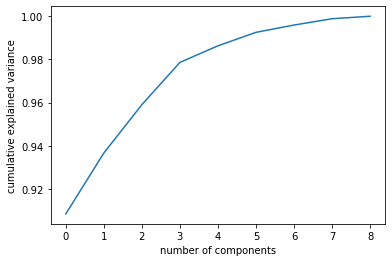

In [57]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

***We already found that PCA creates 3 components to get 95% of information after projection.***

## Now let's select only 2 components

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(184, 2)

In [61]:
pca.explained_variance_ratio_

array([0.90837038, 0.02822623])

Text(0, 0.5, 'Second Principal Component')

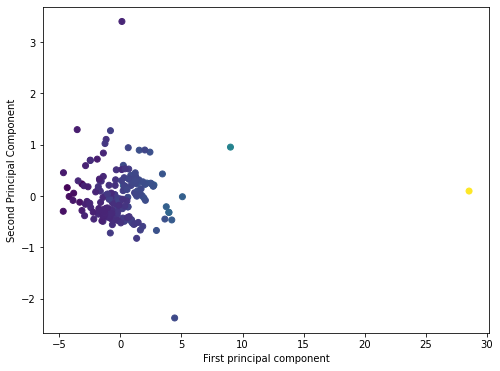

In [60]:

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c = data['G9'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

***Clearly these two components can separate the data from different classes***

We observe the outliers when the value of components are (0, 3.5), (4, -2.5), and where first component value is >=10.